In [16]:
############ Plotting RGB Histogram

#--------RGB histogram match---------------------#

import PIL
from PIL import Image
import imagehash
import os
import cv2
import time
from pprint import pprint
from imutils import paths
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import random

In [17]:
#-----------Training Images RGB Hist GENERRATION----------#


IMGDIR = "./imagesbooks/"

# Hyper-Parameter for comparing histograms
correl_threshold = 0.70

trainhistpath = list(paths.list_images(IMGDIR))
# print (TrainhistPaths)

# init RGB dataframe for Training image lib-------#
Trainhist = pd.DataFrame(columns=['file','imagehist'])

start = time.time()

for f in trainhistpath:
    image = cv2.imread(f)
    if image is None:
        continue
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # extract a RGB color histogram from the image,
    # using 8 bins per channel, normalize, and update
    # the index
    hist = cv2.calcHist([image], [0, 1, 2], None, [8, 8, 8],[0, 256, 0, 256, 0, 256])
    hist = cv2.normalize(hist, None)
    Trainhist =  Trainhist.append({'file':f,'imagehist':hist}, ignore_index=True)

t= time.time() - start
print("[INFO] processed {} images in {:.2f} seconds".format(
len(trainhistpath), t))
print (Trainhist.head())

[INFO] processed 520 images in 6.77 seconds
                             file  \
0  ./imagesbooks/ukbench03097.jpg   
1  ./imagesbooks/ukbench08609.jpg   
2  ./imagesbooks/ukbench07999.jpg   
3  ./imagesbooks/ukbench02725.jpg   
4  ./imagesbooks/ukbench05956.jpg   

                                           imagehist  
0  [[[0.006777836, 0.00022676773, 0.0, 0.0, 0.0, ...  
1  [[[0.8430189, 0.06046971, 0.0006953615, 1.7829...  
2  [[[0.0075966925, 3.356418e-05, 0.0, 0.0, 0.0, ...  
3  [[[0.36499497, 0.001689277, 0.0, 0.0, 0.0, 0.0...  
4  [[[0.13786899, 0.0003517858, 0.0, 0.0, 0.0, 0....  


./imagesbooks/ukbench06049.jpg


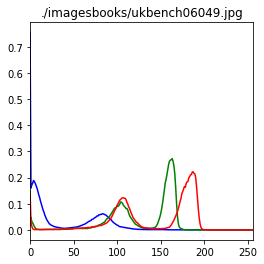

In [60]:
# reading query image

# q_path = random.sample(trainhistpath, 1)[0]
q_path = './imagesbooks/ukbench06049.jpg'
print (q_path)

# visualizing the histogram
def showHistogram (q_path):
    import matplotlib.pyplot as plt
    img = cv2.imread(q_path)
    color = ('b','g','r')
    plt.figure(figsize=(4,4))
    for i,col in enumerate(color):
        histr = cv2.calcHist([img],[i],None,[256],[0,256])
        histr = cv2.normalize(histr, None)
        plt.title(q_path)
        plt.plot(histr,color = col)
        plt.xlim([0,256])
    plt.show()
showHistogram (q_path)

q_img = cv2.imread(q_path)
query_paths = [q_path]

hist_query = []
for path in query_paths:
    image = cv2.imread(path)
    
    if image is None:
        continue
    
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # extract a RGB color histogram from the image,
    # using 8 bins per channel, normalize, and update the index
    hist = cv2.calcHist([image], [0, 1, 2], None, [8, 8, 8],[0, 256, 0, 256, 0, 256])
    hist = cv2.normalize(hist, None)
    hist_query.append((path,hist))
# print (hist_query)
    

In [41]:
# Histmatch = pd.DataFrame(colums= ['file','matches'])
hist_matches = []
for i in range(len(hist_query)):
    matches = []

    for index, row in Trainhist.iterrows():
        
        cmp = cv2.compareHist(hist_query[i][1], row['imagehist'], cv2.HISTCMP_CORREL)
        
        if cmp > 0.3:
            matches.append((cmp, row['file']))

    matches.sort(key=lambda x : x[0] , reverse = True)
    hist_matches.append((hist_query[i][0],matches))

print (hist_matches)
# print (len(b))

[('./imagesbooks/ukbench06049.jpg', [(1.0, './imagesbooks/ukbench06049.jpg'), (0.9435221522330853, './imagesbooks/ukbench06050.jpg'), (0.8715263721413026, './imagesbooks/ukbench06051.jpg'), (0.8545837108464595, './imagesbooks/ukbench06048.jpg'), (0.5609153868439702, './imagesbooks/ukbench05598.jpg'), (0.533483283110094, './imagesbooks/ukbench05964.jpg'), (0.5238858616793332, './imagesbooks/ukbench05599.jpg'), (0.4584531902161824, './imagesbooks/ukbench05603.jpg'), (0.4581774504833687, './imagesbooks/ukbench05600.jpg'), (0.407526302371211, './imagesbooks/ukbench05965.jpg'), (0.3760760048939046, './imagesbooks/ukbench05966.jpg'), (0.3583789707890428, './imagesbooks/ukbench05602.jpg'), (0.3471506732048358, './imagesbooks/ukbench05967.jpg')])]


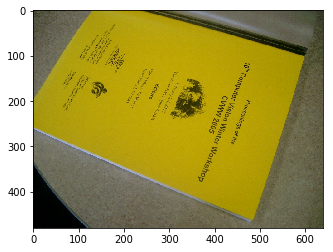

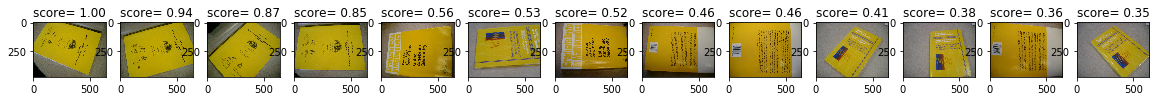

['./imagesbooks/ukbench06049.jpg', './imagesbooks/ukbench06050.jpg', './imagesbooks/ukbench06051.jpg', './imagesbooks/ukbench06048.jpg', './imagesbooks/ukbench05598.jpg', './imagesbooks/ukbench05964.jpg', './imagesbooks/ukbench05599.jpg', './imagesbooks/ukbench05603.jpg', './imagesbooks/ukbench05600.jpg', './imagesbooks/ukbench05965.jpg', './imagesbooks/ukbench05966.jpg', './imagesbooks/ukbench05602.jpg', './imagesbooks/ukbench05967.jpg']


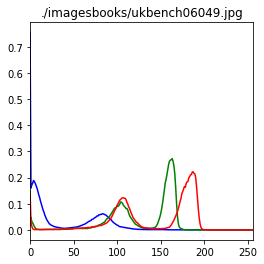

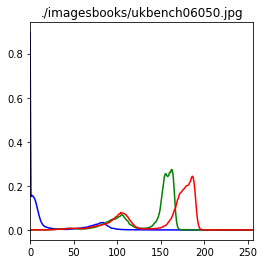

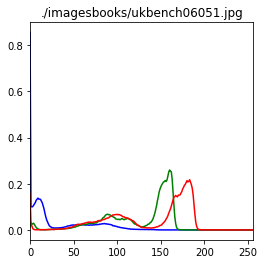

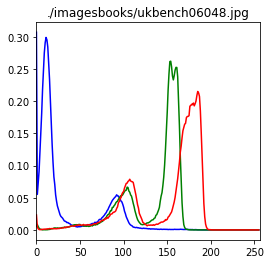

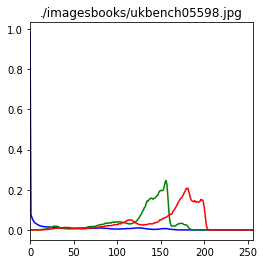

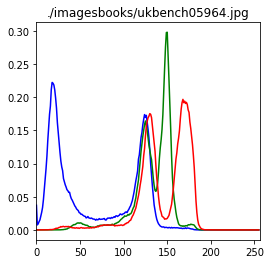

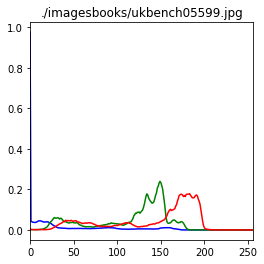

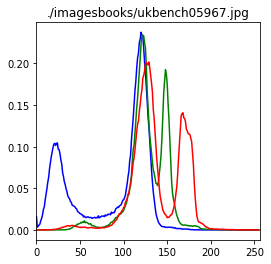

In [83]:
# DATA 

d = [] 
p = []

r , q = hist_matches[0]

for item in q: 
    score , thispath = item 
    d.append(str(thispath))
    p.append(score)

simg = plt.imread(r)
plt.imshow(simg)
plt.show()
# d => list of image paths 
# d = 

# p => list of corresp scores 

# PLOTTING FUNCTION 

# columns = 5
columns = len(d)
# rows = len(d)//columns + ( 1 if (len(d)%columns > 0 ) else 0 )
rows = 1
l = 0

# define fig as function of row, col
# fig=plt.figure(figsize=(rows*1, columns*1))
# fig=plt.figure(figsize=(10,10))

fig=plt.figure(figsize=(20,20*columns))

# ax enables access to manipulate each of subplots
ax = []


for i in range(1, columns*rows +1):
    if l<len(d) : 
        img = plt.imread(d[l])
        ax.append(fig.add_subplot(rows, columns, i))
        ax[-1].set_title('score= %2.2f'%p[l])
        plt.imshow(img)
    l +=1
plt.show()




# fig=plt.figure(figsize=(6,6))
# # ax enables access to manipulate each of subplots
# ax = []
# l = 0
# for i in range(1, columns*rows +1):
#     img = cv2.imread(d[l])
#     color = ('b','g','r')
#     for i,col in enumerate(color):
#         histr = cv2.calcHist([img],[i],None,[256],[0,256])
#         histr = cv2.normalize(histr, None)
#         plt.plot(histr,color = col)
#         plt.xlim([0,256])
#     ax.append(fig.add_subplot(rows, columns, i))
#     ax[-1].set_title('score='+str(p[l]))
#     l +=1
# plt.show()

# showHistogram(r)

print (d)

showHistogram(d[0])
showHistogram(d[1])
showHistogram(d[2])
showHistogram(d[3])
showHistogram(d[4])
showHistogram(d[5])
showHistogram(d[6])
showHistogram(d[12])

In [74]:
columns

5

In [70]:
rows

3